In [14]:
% matplotlib notebook
import sigpy.plot as pl
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import scipy.io
from torch.autograd import Variable
import UFNet
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [15]:
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
# print(MRF_dic.keys())
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
N_dict = t1_list.shape[0]
def read_flipangles(flip_file):
    f = open(flip_file)
    flips =  [float(a) for a in f.readlines()]
    f.close()
    return np.array(flips)
flips = read_flipangles('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/flipangles.txt')
N_flip = len(flips)
fp_dic = np.hstack(list(fp_dict[0][0])).reshape((N_flip, 2, N_dict)).transpose((0, 2, 1))
fp_dic = fp_dic[:,:,0] + 1j * fp_dic[:,:,1]
print(fp_dic.shape)
fp_train = fp_dic.transpose(1,0)[:,None,:]
print(fp_train.shape)
nd = 3

(500, 22031)
(22031, 1, 500)


In [79]:
fp_train1 = np.concatenate((np.real(fp_train),np.imag(fp_train)),1)

In [81]:
fp_train1.shape

(22031, 2, 500)

In [94]:
p = np.random.rand(22031,nd)
p_norm = np.linalg.norm(p,axis=1)
p_normal = p/p_norm[None,:].T
B_tensor = torch.tensor(p_normal)
B_tensor_cuda = B_tensor.to(device)
fp_train_cuda = torch.tensor(abs(fp_train)).to(device)
fp_train_cuda1 = torch.tensor(np.concatenate((np.real(fp_train),np.imag(fp_train)),1)).to(device)
mac = fp_train_cuda.max(dim=2)
# fp_train_cuda = fp_train_cuda[:,0,:]/mac[0]
fp_train_cuda = fp_train_cuda1[:,:,:]/mac[0].unsqueeze(2)

In [88]:
mac[0].shape

torch.Size([22031, 1])

In [16]:
p = np.random.rand(22031,nd)
p_norm = np.linalg.norm(p,axis=1)
p_normal = p/p_norm[None,:].T
B_tensor = torch.tensor(p_normal)
B_tensor_cuda = B_tensor.to(device)
fp_train_cuda = torch.tensor(abs(fp_train)).to(device)
mac = fp_train_cuda.max(dim=2)
fp_train_cuda = fp_train_cuda[:,0,:]/mac[0]
fp_train_cuda = fp_train_cuda.unsqueeze(1)
fp_train_cuda = fp_train_cuda[:,0,:] - fp_train_cuda.mean(dim=2)
fp_train_cuda = fp_train_cuda.unsqueeze(1)

In [95]:
import matplotlib.pyplot as plt
plt.plot(fp_train_cuda.detach().cpu().numpy()[10998,:][0,:])
plt.show()

<IPython.core.display.Javascript object>


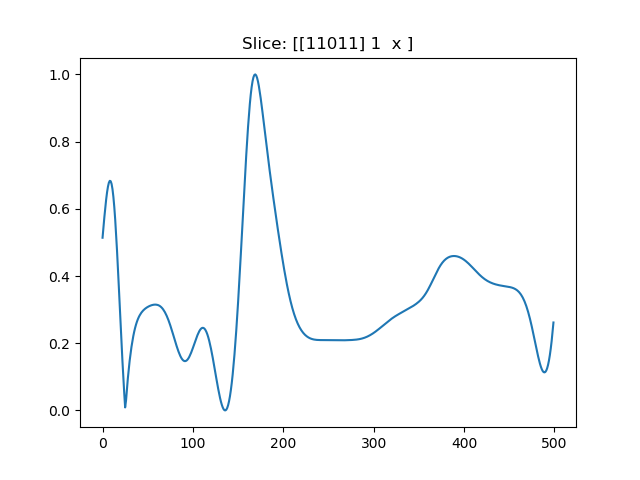

In [98]:
pl.LinePlot(fp_train_cuda.detach().cpu().numpy())

<IPython.core.display.Javascript object>


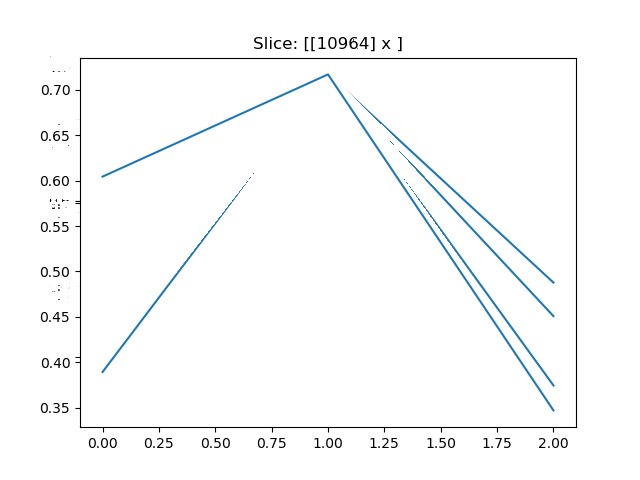

In [110]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [126]:
net = UFNet.PixelNet(2,3).to(device)
with torch.no_grad(): 
    for j in range(22031):
        inp = fp_train_cuda[j,:,:].unsqueeze(0)
        out = net(inp)
#         break
        B_tensor_cuda[j,:] = out
        print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244


3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928


5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748


7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545


9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235


10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
1083

12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
1232

13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
1371

14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
1512

16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
1658

17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
1806

19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
19532
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
19544
19545
19546
19547
19548
19549
19550
19551
19552
19553
1955

20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981
20982
20983
20984
20985
20986
20987
20988
20989
20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
2105

In [40]:
torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP_final{}.pth'.format(epoch + 1))

In [122]:
# Here we train the network
n_dictionary = 22031
n_dimension = 3
tau = 0.1
epochs = 20
# net = UFNet.PixelNet(1).cuda()
optimizer = torch.optim.Adam(net.parameters(),
                          lr=0.00001)
criterion = torch.nn.CrossEntropyLoss()
loss_all = list([])
index_dic = np.random.permutation(n_dictionary)
batchsize = 256
n_step = int(n_dictionary/batchsize)

num = np.floor(n_dictionary/batchsize).astype(int)

for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(n_step):
        ipd = index_dic[index*batchsize:(index+1)*batchsize]
        
        input_dic = fp_train_cuda[ipd,:,:]
        output_dic = net(input_dic)
#         break
        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic1,torch.LongTensor(ipd).cuda())
        B_tensor_cuda[ipd,:] = output_dic.double()
        if index % 100 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

Starting Epoch: 1
9.99886703491211
Starting Epoch: 2
9.965688705444336
Starting Epoch: 3
9.469494819641113
Starting Epoch: 4
9.064903259277344
Starting Epoch: 5
8.645127296447754
Starting Epoch: 6
8.302590370178223
Starting Epoch: 7
8.073739051818848
Starting Epoch: 8
7.891787052154541
Starting Epoch: 9
7.739468097686768
Starting Epoch: 10
7.591444492340088
Starting Epoch: 11
7.431170463562012
Starting Epoch: 12
7.339125156402588
Starting Epoch: 13
7.252897262573242
Starting Epoch: 14
7.160183429718018
Starting Epoch: 15
7.116978168487549
Starting Epoch: 16
7.112738132476807
Starting Epoch: 17
7.063728332519531
Starting Epoch: 18
7.0633134841918945
Starting Epoch: 19
7.03223180770874
Starting Epoch: 20
7.025293827056885


In [117]:
B_tensor_test = B_tensor_cuda*0

<IPython.core.display.Javascript object>


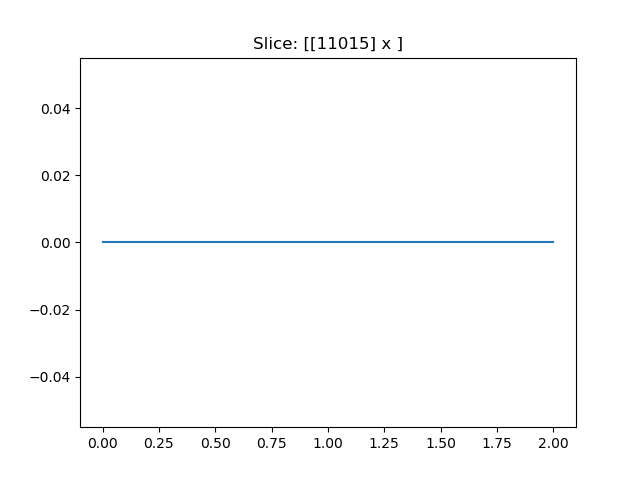

In [104]:
pl.LinePlot(B_tensor_test.detach().cpu().numpy())

In [135]:
dic_compressed = B_tensor_test.detach().cpu().numpy()

In [136]:
dic_compressed.min()

-0.9999825954437256

In [80]:
x.shape

(40, 40)

In [59]:
t1_list.shape

(22031, 1)

<IPython.core.display.Javascript object>


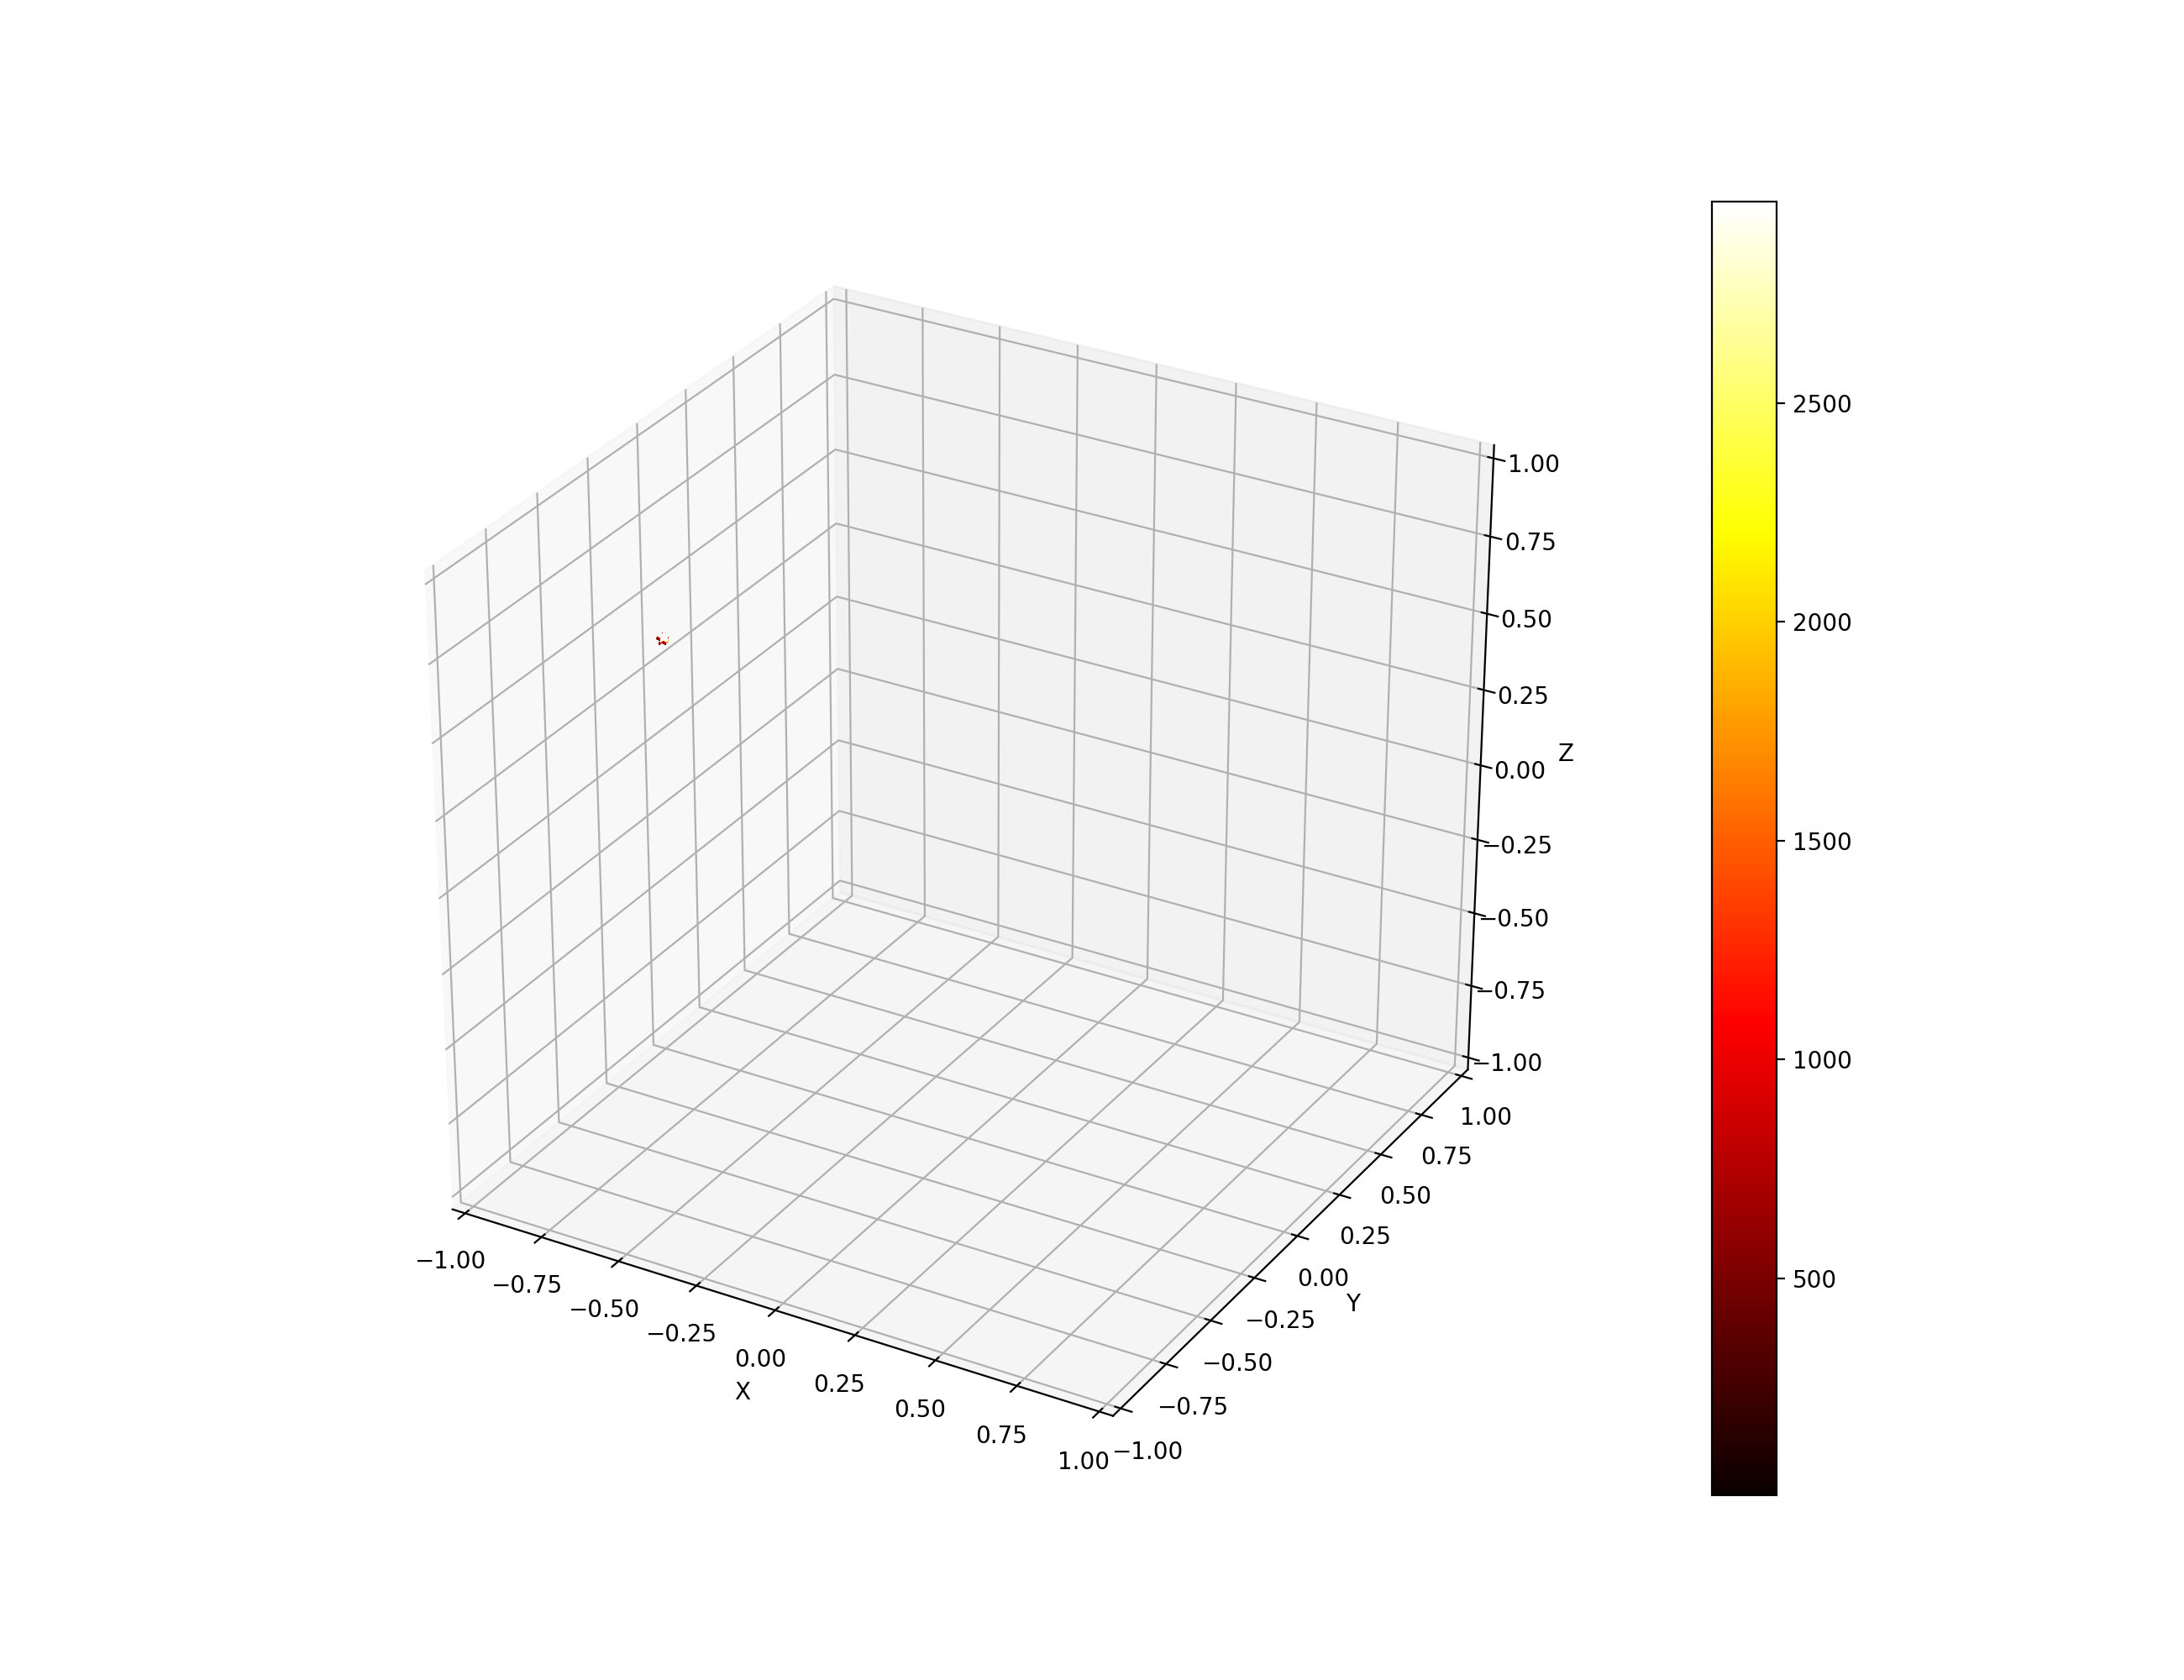

<IPython.core.display.Javascript object>


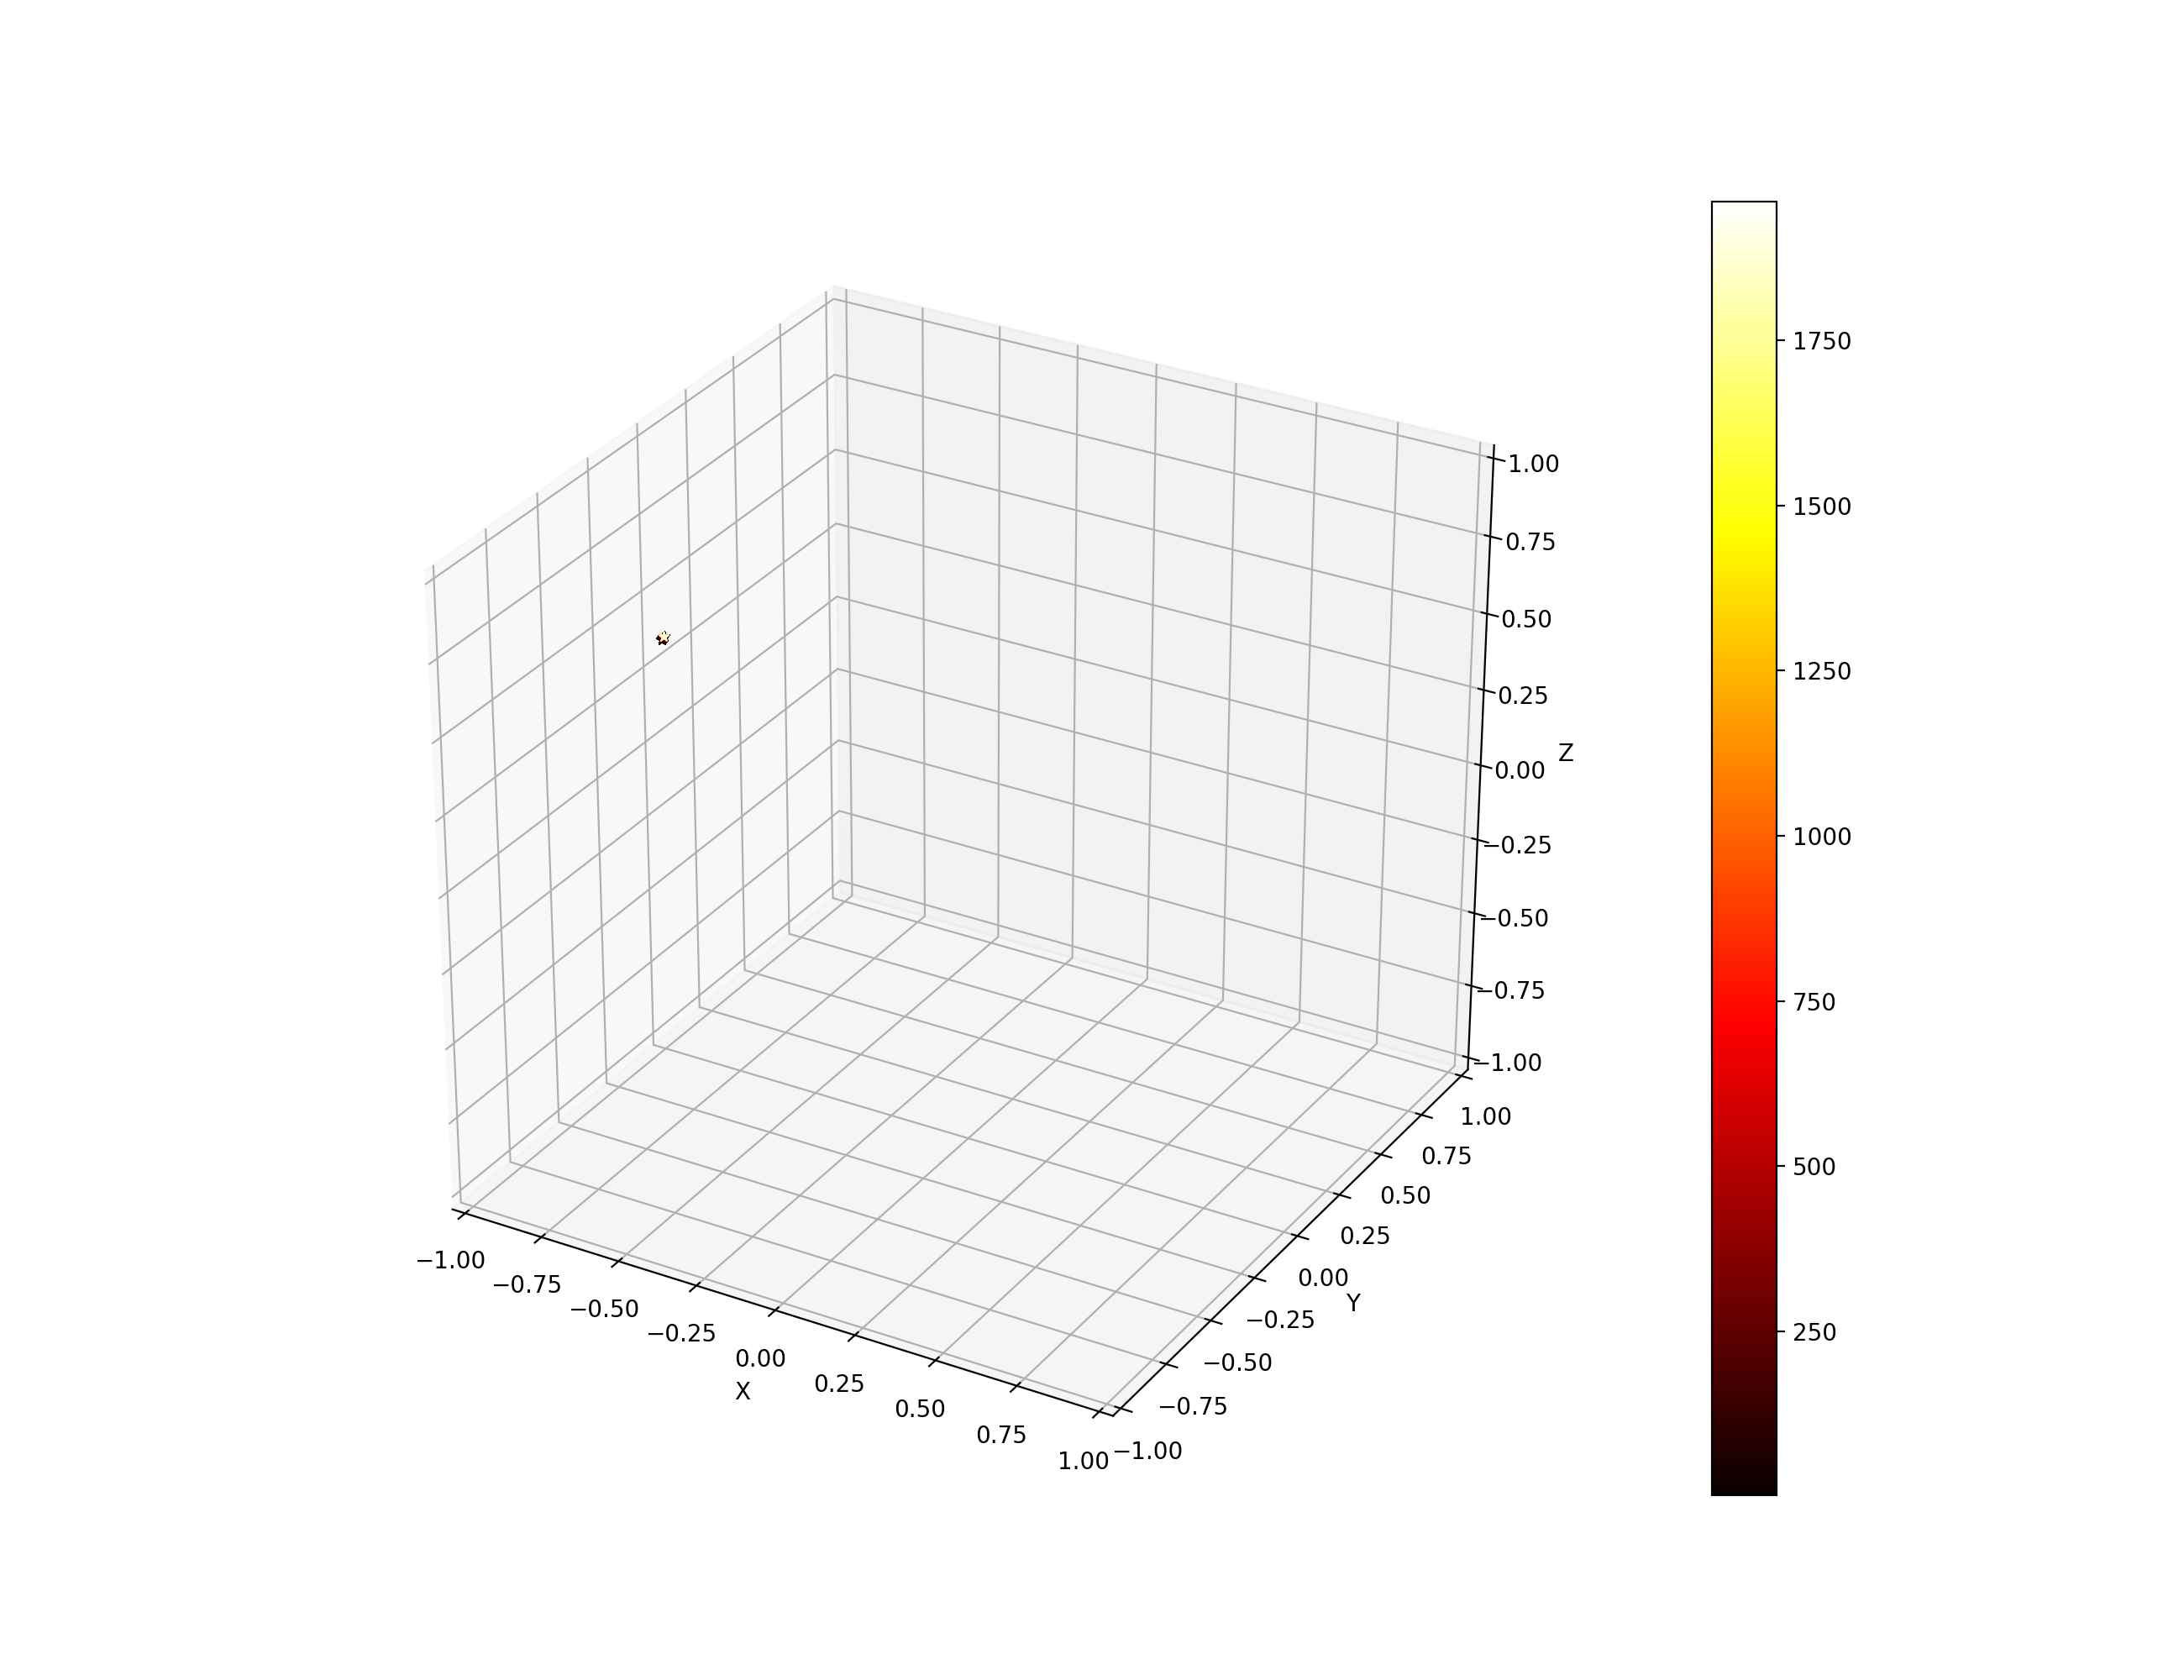

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# dic_compressed = np.load("compressed_dic_final.npy")
dic_compressed = B_tensor_cuda.detach().cpu().numpy()
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
# print(MRF_dic.keys())
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
# data = np.random.randint(0, 255, size=[40, 40, 40])
fig = plt.figure(figsize=(13,10))
# x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
# ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')
p = ax.scatter(dic_compressed[:,0], dic_compressed[:,1], dic_compressed[:,2], c=t1_list[:,0],marker = '*',linewidths=0.3,cmap = "hot")
ax.set_xlim([-1, 1])
ax.set_zlim([-1,1])
ax.set_ylim([-1, 1])
fig.colorbar(p)
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')


fig1 = plt.figure(figsize=(13,10))
# x, y, z = data[0], data[1], data[2]
ax1 = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
# ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')
p1 = ax1.scatter(dic_compressed[:,0], dic_compressed[:,1], dic_compressed[:,2], c=t2_list[:,0],marker = '*',linewidths=0.3,cmap = "hot")
ax1.set_xlim([-1, 1])
ax1.set_zlim([-1,1])
ax1.set_ylim([-1, 1])
fig1.colorbar(p1)
ax1.set_zlabel('Z')  # 坐标轴
ax1.set_ylabel('Y')
ax1.set_xlabel('X')
plt.show()


In [128]:
np.save("compressed_output_test_complex_init.npy",B_tensor_cuda.detach().cpu().numpy())

In [28]:
#MRF
MRF_data = np.load("/mikQNAP/augmented_data/MRF/MRF_norm_volunteer9_4.npy")

In [29]:
t1m = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T1_mapping.npy")
t2m = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T2_mapping.npy")

In [30]:
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
t1_t2_list = np.hstack((t1_list, t2_list)) # ms

In [31]:
t1m[100,100]

750.0

In [33]:
MRF_data_complex = abs(MRF_data[:500,:,:]+1j*MRF_data[500:,:,:])

In [34]:
import torch.nn.functional as f

In [36]:
pdata = torch.tensor(MRF_data_complex[:,100,100][None,None,:]).cuda()
pd =pdata/pdata.max()
pout = net(pd)
out = torch.mm(B_tensor_test,pout.transpose(0,1).double())
n = out.argmax()

In [39]:
T1_matrix = np.zeros((320,320))
T2_matrix = np.zeros((320,320))

In [45]:
T1_matrix[150,100]

1840.0

In [72]:
for i in range(320):
    print(i)
    for j in range(320):
        pdata = torch.tensor(MRF_data_complex[:,i,j][None,None,:]).cuda()
        pd =pdata/pdata.max()
        pout = net(pd)
        out = torch.mm(B_tensor_test,pout.transpose(0,1).double())
        n = out.argmax()
        T1_matrix[i,j] = t1_t2_list[n,0]
        T2_matrix[i,j] = t1_t2_list[n,1]

0


NameError: name 'MRF_data_complex' is not defined

<IPython.core.display.Javascript object>


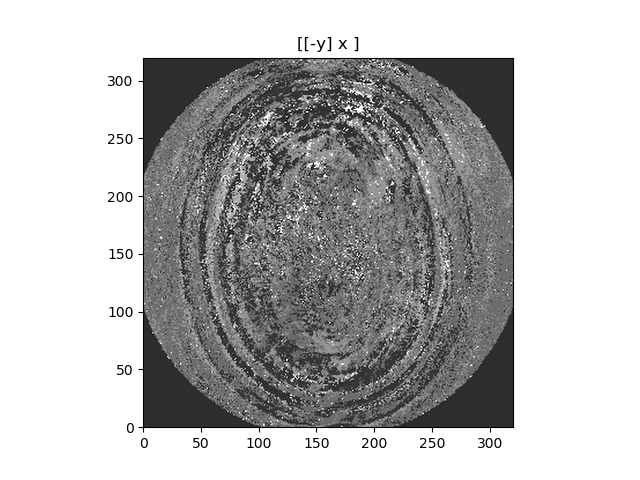

In [46]:
pl.ImagePlot(T1_matrix)

In [125]:
pout.shape

torch.Size([1, 3])

<IPython.core.display.Javascript object>


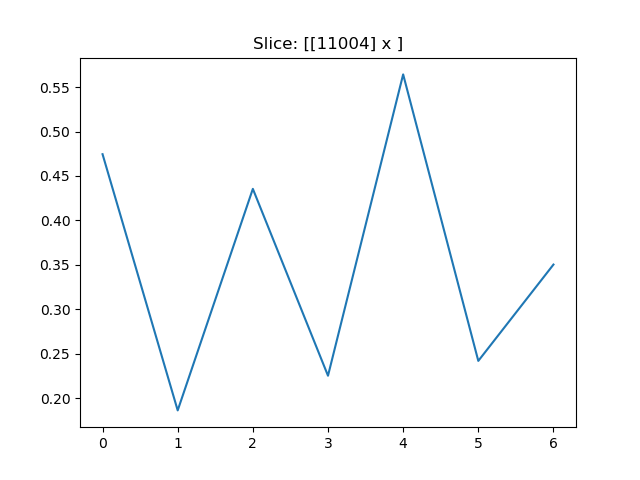

In [26]:
pl.LinePlot(B_tensor_test[:,...].detach().cpu().numpy())

<IPython.core.display.Javascript object>


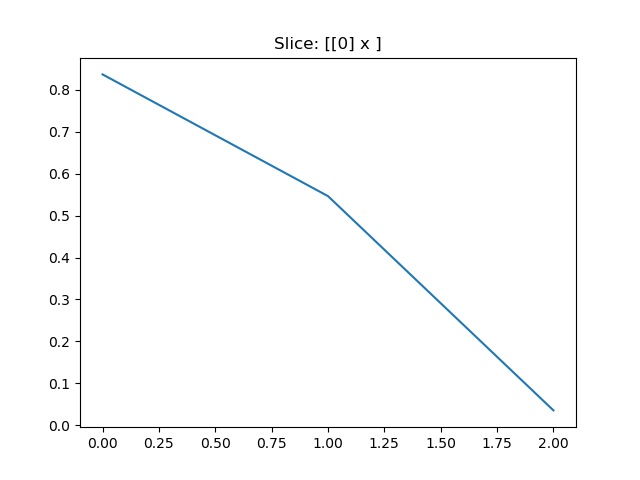

In [126]:
pl.LinePlot(pout.detach().cpu().numpy())

In [127]:
out = torch.mm(B_tensor_test,pout.transpose(0,1).double())

In [130]:
out[2764]

tensor([0.9996], device='cuda:0', dtype=torch.float64,
       grad_fn=<SelectBackward>)

In [129]:
out.argmax()

tensor(2764, device='cuda:0')

In [54]:
B_tensor_test.shape

torch.Size([22031, 3])

In [49]:
pdata.shape

torch.Size([1, 1, 500])

<IPython.core.display.Javascript object>


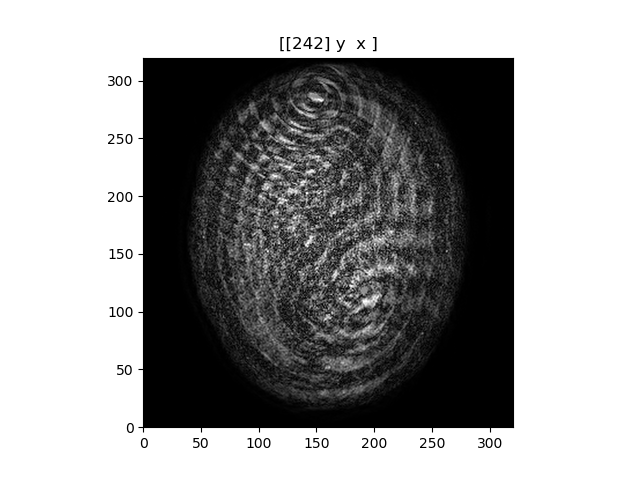

In [44]:
pl.ImagePlot(MRF_data_complex)

In [118]:
with torch.no_grad(): 
    for j in range(22031):
        inp = fp_train_cuda[j,:,:].unsqueeze(0)
        out = net(inp)
        B_tensor_test[j,:] = out
        print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174


3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847


5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501


6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186


8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018


10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
1068

11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
1212

13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
1366

14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
1514

16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
1654

17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
1796

19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
19354
19355
19356
19357
19358
19359
19360
19361
19362
19363
19364
19365
19366
19367
19368
19369
19370
19371
19372
19373
19374
19375
19376
19377
19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
1950

20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
2093

In [24]:
fp_train_1 = fp_train[:,0,:]

In [48]:
fp_dic.shape

(500, 22031)

In [49]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [50]:
pca.fit(fp_dic.T)

/home/kewang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
dictionary_pca = pca.transform(fp_dic.T)

<IPython.core.display.Javascript object>


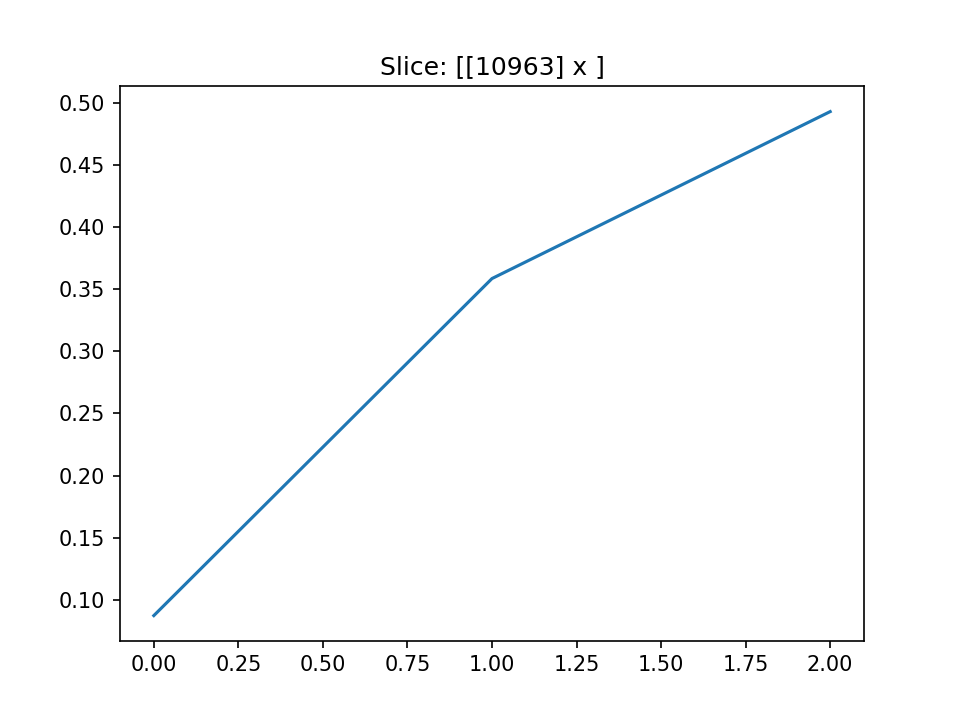

In [56]:
pl.LinePlot(dictionary_pca)

In [35]:
fp_train_1

array([[0.00812182, 0.00944535, 0.01044788, ..., 0.00621854, 0.00690465,
        0.00767356],
       [0.00719178, 0.00948191, 0.01054393, ..., 0.00627772, 0.00697027,
        0.00774634],
       [0.00719182, 0.00948195, 0.01054397, ..., 0.00627775, 0.0069703 ,
        0.00774637],
       ...,
       [0.03346432, 0.03641555, 0.03937593, ..., 0.0121684 , 0.0137765 ,
        0.01552572],
       [0.03335859, 0.0363005 , 0.03925149, ..., 0.01216448, 0.01377423,
        0.01552494],
       [0.03325693, 0.03618988, 0.03913182, ..., 0.01216081, 0.01377223,
        0.01552445]], dtype=float32)

<IPython.core.display.Javascript object>


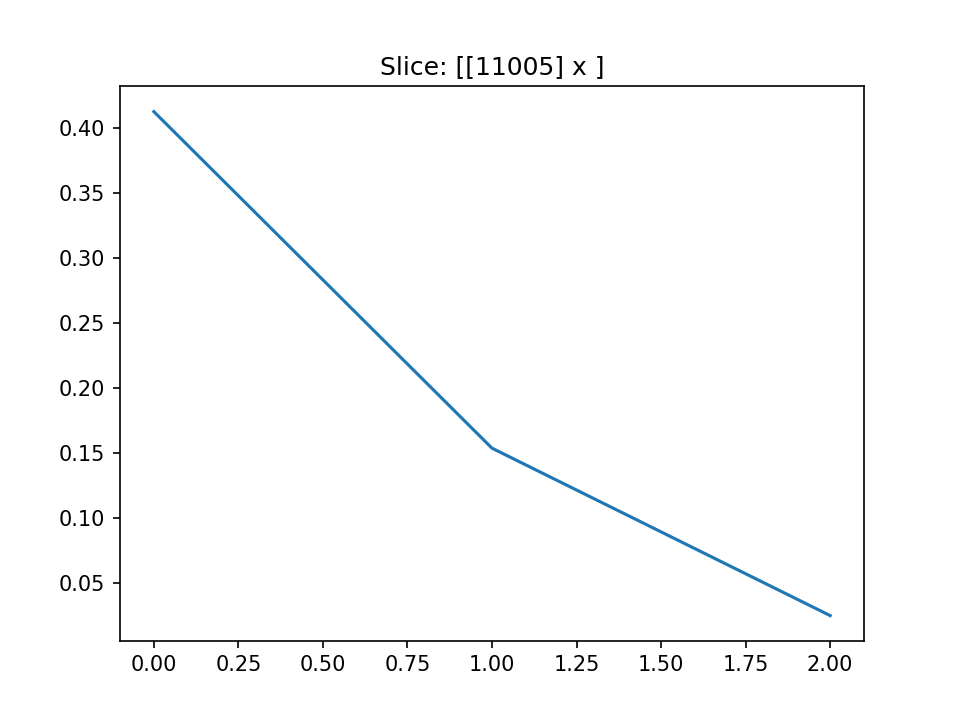

In [42]:
pl.LinePlot(dictionary_pca)

In [18]:
# Here we train the network
n_dictionary = 22031
n_dimension = 3
tau = 0.07
epochs = 10000
net = UFNet.PixelNet(1).cuda()

# net = UFNet.PixelNet(1).cuda()
optimizer = torch.optim.Adam(net.parameters(),
                          lr=0.02)
criterion = torch.nn.CrossEntropyLoss()
loss_all = list([])
index_dic = np.random.permutation(n_dictionary)
batchsize = 8
num = np.floor(n_dictionary/batchsize).astype(int)
net = UFNet.PixelNet(1).cuda()

for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(num):
        
        input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
        output_dic = net(input_dic)
        ipd = index_dic[index*batchsize:(index+1)*batchsize]

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic1,torch.LongTensor(ipd).cuda())
        
        if index % 1000 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index % 1000 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
# #         if index >1:
# #             if index % 3000 == 0:
# #                 optimizer.zero_grad()
#         optimizer.step()
#         optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #         loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        B_tensor_cuda[ipd,:] = output_dic.double()
#                     optimizer.step()
#     optimizer.zero_grad()
#     for index in range(n_dictionary):
#         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
#         output_dic = net(input_dic)
#         B_tensor_cuda[index,:] = output_dic


#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index >1:
#             if index % 5000 == 0:
# #                 optimizer.zero_grad()
#                 optimizer.step()
#                 optimizer.zero_grad()
#             if index % 1000 == 0:
#                 print(loss.item())
#                 loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[index,:] = output_dic
    print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
    torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
    np.save("loss_all.npy",np.array(loss_all))
    print('Checkpoint {} saved !'.format(epoch + 1))
# for index in range(num):
#         net.train()
#         input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
#         output_dic = net(input_dic)
#         ipd = index_dic[index*batchsize:(index+1)*batchsize]

#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
# #         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
# #         loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
# #         if index % 20 == 0:
# #             print(loss.item())
# #             loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[ipd,:] = output_dic.double()
        
        
# for epoch in range(epochs):
#     index_dic = np.random.permutation(n_dictionary)
#     net.train()
#     epoch_loss = 0
#     optimizer.zero_grad()
#     print("Starting Epoch: %d" %(epoch+1))
#     for index in range(num):
        
#         input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
#         output_dic = net(input_dic)
#         ipd = index_dic[index*batchsize:(index+1)*batchsize]

#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
#         if index % 20 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# #         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
# #         loss.backward()
# #         if index % 1000 == 0:
# #             print(loss.item())
# #             loss_all.append(loss.item())
# # #         if index >1:
# # #             if index % 3000 == 0:
# # #                 optimizer.zero_grad()
# #         optimizer.step()
# #         optimizer.zero_grad()
# # #             if index % 1000 == 0:
# # #                 print(loss.item())
# # #         loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
# #         optimizer.step()
# #         B_tensor_cuda[ipd,:] = output_dic.double()
# #                     optimizer.step()
# #     optimizer.zero_grad()
# #     for index in range(n_dictionary):
# #         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
# #         output_dic = net(input_dic)
# #         B_tensor_cuda[index,:] = output_dic


# #         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# # #             print(output_dic)
# # #             B_tensor_cuda.requires_grad = False
# #         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# # #             print(output_dic.requires_grad)
# # #             print(output_dic.shape)
# #         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
# #         loss.backward()
# #         if index >1:
# #             if index % 5000 == 0:
# # #                 optimizer.zero_grad()
# #                 optimizer.step()
# #                 optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #                 loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
# #         optimizer.step()
# #         B_tensor_cuda[index,:] = output_dic
#     print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
#     torch.save(net.state_dict(),
#                        '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
#     np.save("loss_all.npy",np.array(loss_all))
#     print('Checkpoint {} saved !'.format(epoch + 1))

Starting Epoch: 1
9.999202728271484
11.29763412475586
11.82718563079834
Epoch finished ! Loss: 1.422570584013082
Checkpoint 1 saved !
Starting Epoch: 2
9.999195098876953
9.998961448669434
10.003083229064941
Epoch finished ! Loss: 1.2496942301364877
Checkpoint 2 saved !
Starting Epoch: 3
10.000502586364746
9.999582290649414
9.999588966369629
Epoch finished ! Loss: 1.2496296408757452
Checkpoint 3 saved !
Starting Epoch: 4
10.002862930297852
9.99974536895752
10.000652313232422
Epoch finished ! Loss: 1.2496295875451313
Checkpoint 4 saved !
Starting Epoch: 5
9.999897003173828
10.000311851501465
10.00069522857666
Epoch finished ! Loss: 1.2496289165403844
Checkpoint 5 saved !
Starting Epoch: 6
9.99995231628418
9.99937915802002
9.99991512298584
Epoch finished ! Loss: 1.2496281983518962
Checkpoint 6 saved !
Starting Epoch: 7
9.999719619750977
9.999177932739258
10.000679969787598
Epoch finished ! Loss: 1.249629861210831
Checkpoint 7 saved !
Starting Epoch: 8
10.000503540039062
10.001120567321777

KeyboardInterrupt: 

In [ ]:
for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(num):
        
        input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
        output_dic = net(input_dic)
        ipd = index_dic[index*batchsize:(index+1)*batchsize]

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
        if index % 20 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index % 1000 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
# #         if index >1:
# #             if index % 3000 == 0:
# #                 optimizer.zero_grad()
#         optimizer.step()
#         optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #         loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[ipd,:] = output_dic.double()
#                     optimizer.step()
#     optimizer.zero_grad()
#     for index in range(n_dictionary):
#         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
#         output_dic = net(input_dic)
#         B_tensor_cuda[index,:] = output_dic


#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index >1:
#             if index % 5000 == 0:
# #                 optimizer.zero_grad()
#                 optimizer.step()
#                 optimizer.zero_grad()
#             if index % 1000 == 0:
#                 print(loss.item())
#                 loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[index,:] = output_dic
    print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
    torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
    np.save("loss_all.npy",np.array(loss_all))
    print('Checkpoint {} saved !'.format(epoch + 1))

<IPython.core.display.Javascript object>


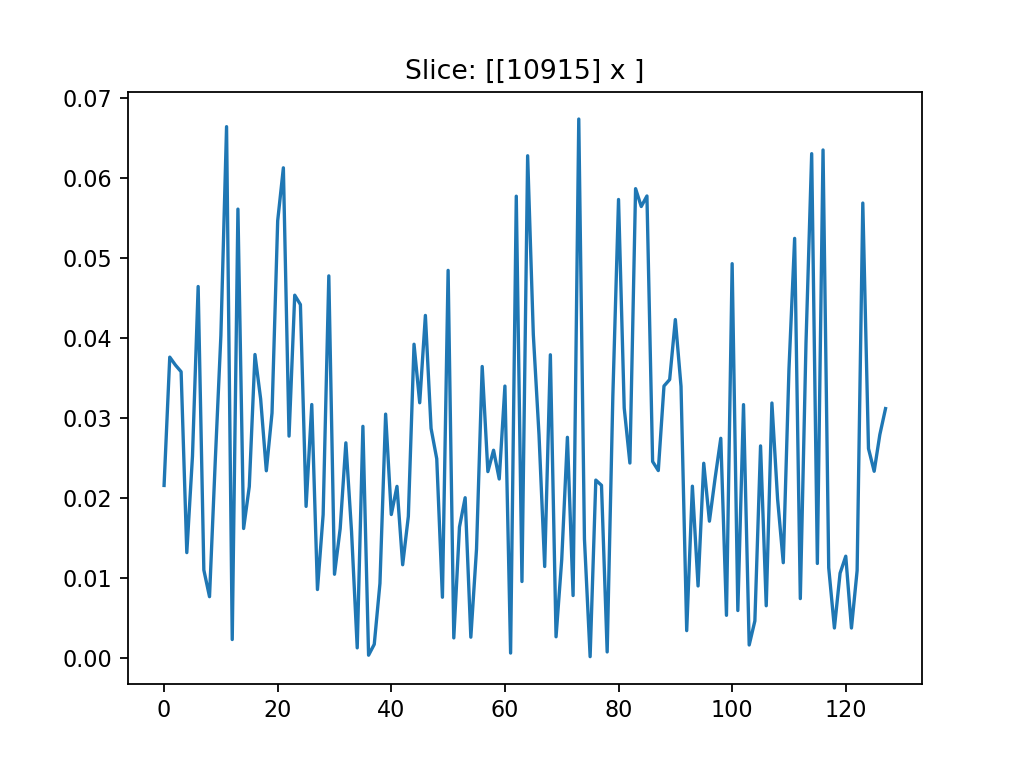

In [19]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [13]:
index

256

In [22]:
print(index)

256


In [14]:
tau = 0.07

In [18]:
input_dic = fp_train_cuda[10000,:,:].unsqueeze(0)
output_dic = net(input_dic)

In [19]:
output_dic.argmax()

tensor(15911, device='cuda:0')

In [56]:
net = UFNet.PixelNet(1).cuda()

<IPython.core.display.Javascript object>


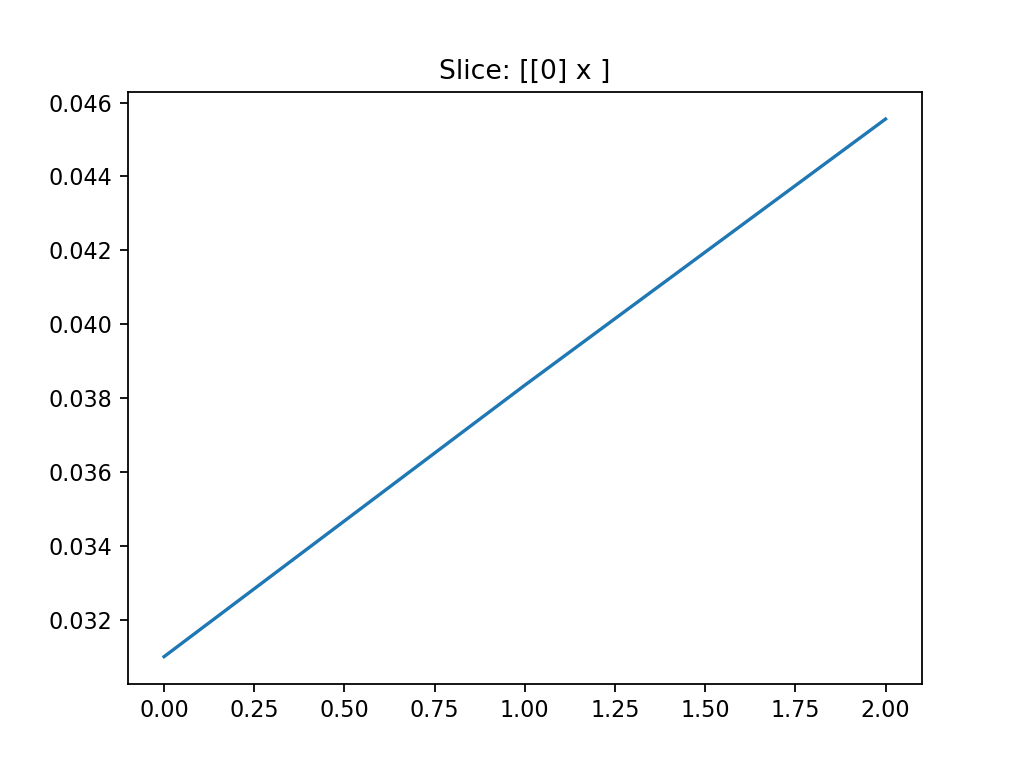

In [21]:
input_dic = fp_train_cuda[20000,:,:].unsqueeze(0)
output_dic = net(input_dic)
input_dic2 = fp_train_cuda[1000,:,:].unsqueeze(0)
output_dic2 = net(input_dic2)
b = output_dic.detach().cpu().numpy() - output_dic2.detach().cpu().numpy()
pl.LinePlot(b)
        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
# output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
# loss = criterion(output_dic1,torch.LongTensor([1000]).cuda())

In [37]:
loss.item()

8.09029769897461

<IPython.core.display.Javascript object>


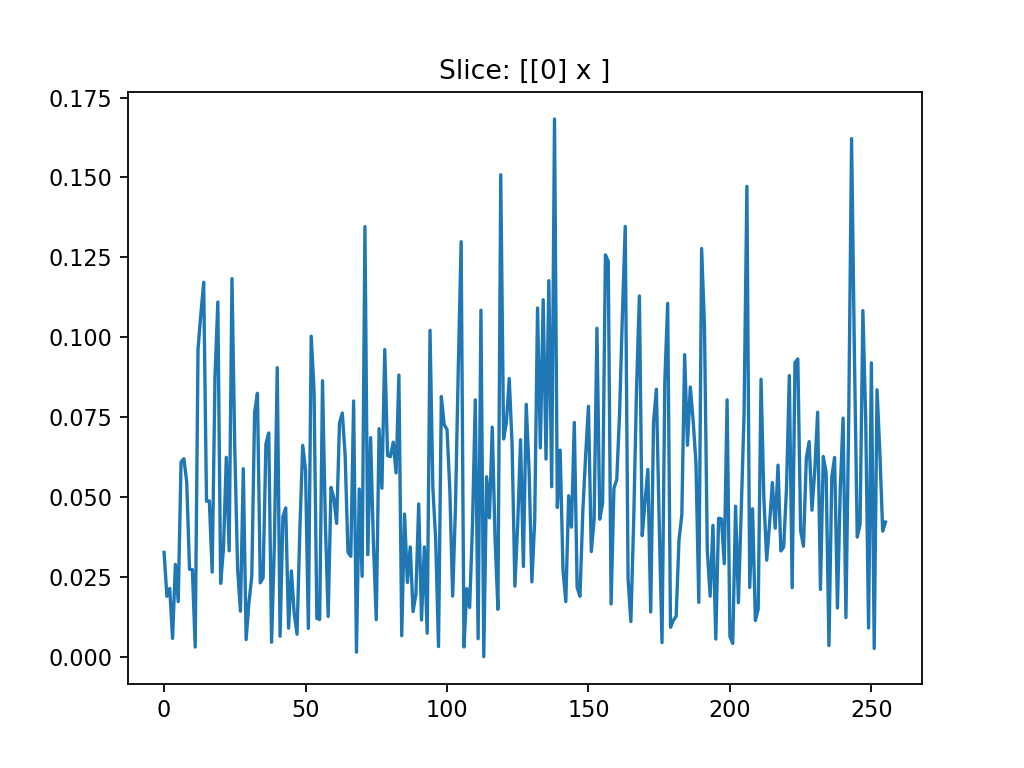

In [44]:
input_dic_test = fp_train_cuda[10000,:,:].unsqueeze(0)
output_dic_test = net(input_dic_test)
pl.LinePlot(output_dic_test.detach().cpu().numpy())
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
loss = cc(output_dic1_test,torch.LongTensor([20000]).cuda())
# output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau

In [43]:
loss

tensor(11.4399, device='cuda:0', grad_fn=<NllLossBackward>)

In [441]:
net_uf = UFNet.PixelNet(1)

In [442]:
net_ufcuda = net_uf.cuda()

In [289]:
input_dic_test = fp_train_cuda[500,:,:].unsqueeze(0)
output_dic_test = net_ufcuda(input_dic_test)
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau

In [25]:
cc = nn.CrossEntropyLoss()

In [292]:
loss = cc(output_dic1_test,torch.LongTensor([500]).cuda())

In [478]:
fp_train.shape

(22031, 1, 500)

In [520]:
nt = UFNet.PixelNet(1)
nt.load_state_dict(torch.load("../checkpoints_unf/CP28.pth"))
nt0 = nt.cuda()
input_dic_test = fp_train_cuda[0,:,:].unsqueeze(0)
output_dic_test = net_ufcuda(input_dic_test)
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
loss = cc(output_dic1_test,torch.LongTensor([10000]).cuda())
# pl.LinePlot(B_tensor_cuda[5000,:].detach().cpu().float().numpy())

In [521]:
output_dic_test

tensor([[-0.0278, -0.0461, -0.0051, -0.0124, -0.0692,  0.0511,  0.0777,  0.0511,
          0.0567, -0.0022,  0.0076,  0.0045,  0.0049,  0.0321,  0.1048,  0.0309,
          0.0544, -0.0074, -0.0242,  0.0515,  0.0363,  0.0095,  0.0489,  0.0086,
          0.0490,  0.0192, -0.0337, -0.0077,  0.0684, -0.0242,  0.0626,  0.0815,
          0.0052,  0.0565, -0.0044,  0.0338,  0.0278,  0.0514, -0.0107,  0.1118,
         -0.0688, -0.0089, -0.0039,  0.0122,  0.1443,  0.1217,  0.0898,  0.0593,
          0.0437, -0.0194,  0.0074,  0.0447,  0.0516, -0.0468,  0.0496, -0.0541,
          0.0405,  0.1281, -0.0651, -0.0795,  0.0337,  0.0210, -0.0542, -0.0216,
          0.1200,  0.0169, -0.0289,  0.0526,  0.0012, -0.0061, -0.0118,  0.0770,
          0.1753,  0.0779,  0.1007,  0.0489,  0.0584, -0.0285,  0.0304, -0.0060,
          0.0087,  0.0344,  0.0186,  0.0361,  0.0037, -0.0170,  0.0988, -0.0226,
          0.1394,  0.0632, -0.0258,  0.0235,  0.0228,  0.0115,  0.0344, -0.0147,
         -0.0226,  0.0684,  

In [438]:
output_dic1_test.max()*tau

tensor(0.9967, device='cuda:0', grad_fn=<MulBackward0>)

In [439]:
B_tensor_cuda = B_tensor.cuda()

In [444]:
train_net(net_ufcuda,1000,1,0.03)

Starting Epoch: 1
11.231678009033203
6.898996353149414
6.962409019470215
6.873554229736328
6.893313407897949
6.816213607788086
6.804896354675293
5.760597229003906
5.20340633392334
5.425529479980469
5.1975555419921875
6.687837600708008
6.51987361907959
9.288898468017578
9.767376899719238
10.115033149719238
10.125466346740723
10.593745231628418
10.194001197814941
10.508931159973145
10.978161811828613
10.783696174621582
10.766740798950195
Epoch finished ! Loss: 8.061122632038577
Checkpoint 1 saved !
Starting Epoch: 2
20.588075637817383
5.318092346191406
6.355125427246094
6.360411643981934
6.7966413497924805
6.87518310546875
6.898260116577148
8.844487190246582
11.861841201782227
11.217596054077148
11.457673072814941
9.812807083129883
8.857461929321289
9.452831268310547
8.689266204833984
8.37021255493164
8.110657691955566
7.9531755447387695
7.798953056335449
7.5826005935668945
7.615848541259766
6.850124359130859
6.64406681060791
Epoch finished ! Loss: 7.967492470008192
Checkpoint 2 saved !


6.365297317504883
6.355071067810059
6.367959022521973
6.337217330932617
6.332459449768066
6.330414772033691
6.328373908996582
6.32525634765625
6.328667640686035
Epoch finished ! Loss: 6.362062752996278
Checkpoint 17 saved !
Starting Epoch: 18
6.329401969909668
6.345732688903809
6.342577934265137
6.359404563903809
6.3367109298706055
6.330753326416016
6.333625793457031
6.325104713439941
6.32119083404541
6.317575454711914
6.315333366394043
6.328916549682617
6.3058671951293945
6.315369606018066
6.3177385330200195
6.3071441650390625
6.322414398193359
6.28521728515625
6.281154632568359
6.278294563293457
6.278702735900879
6.273176193237305
6.274415969848633
Epoch finished ! Loss: 6.314306086956262
Checkpoint 18 saved !
Starting Epoch: 19
6.274829864501953
6.291385650634766
6.278451919555664
6.302734375
6.277644157409668
6.272641181945801
6.275668144226074
6.269293785095215
6.264781951904297
6.264098167419434
6.264013290405273
6.273113250732422
6.257872581481934
6.262814521789551
6.26803302764

KeyboardInterrupt: 

In [239]:
np.save("bank_003.npy",B_tensor_cuda.detach().cpu().numpy())

In [18]:
load = np.load("../unsupervised_fingerprinting/Bank.npy")

<IPython.core.display.Javascript object>


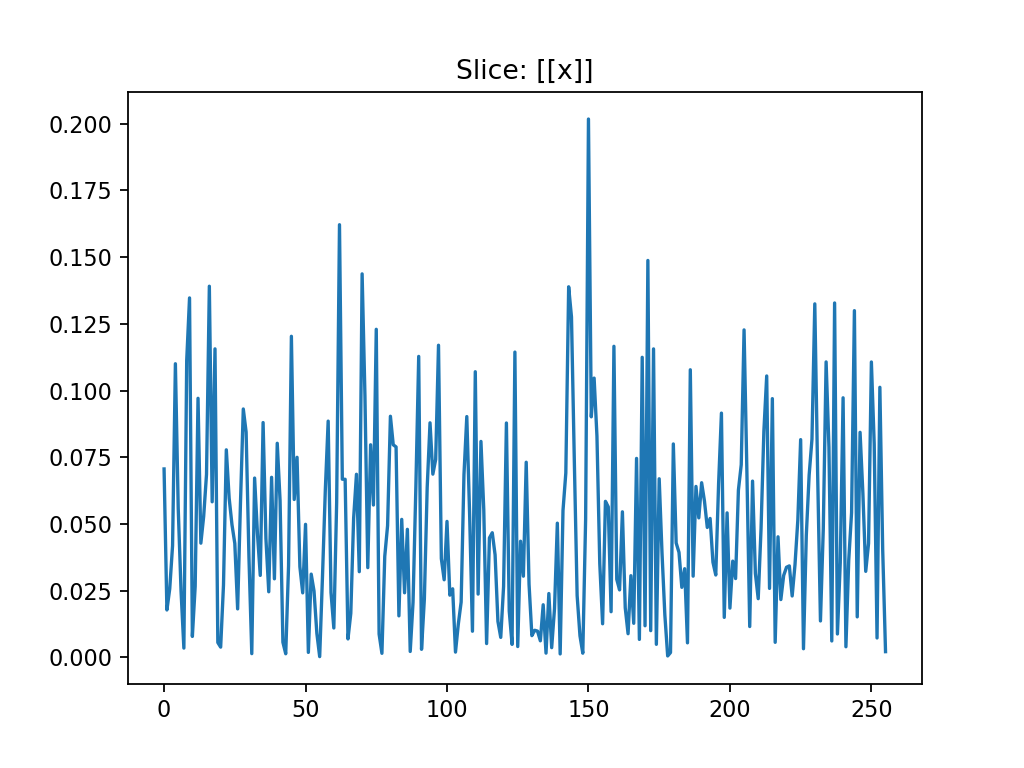

In [22]:
pl.LinePlot(load[100,:])

In [319]:
MRF_data = np.load("/home/kewang/Pytorch-UNet/data/augmented_data/MRF/MRF_norm_volunteer9_4.npy")

In [320]:
T1_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T1_mapping.npy")
T2_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T2_mapping.npy")

In [321]:
MRF_data.shape

(1000, 320, 320)

In [ ]:
pl.LinePlot()

In [406]:
signal = MRF_data[:,100,100]

In [407]:
SP_real = signal[:500][None,None,:]
SP_image = signal[500:][None,None,:]

In [408]:
SP = np.concatenate((SP_real,SP_image),1)

<IPython.core.display.Javascript object>


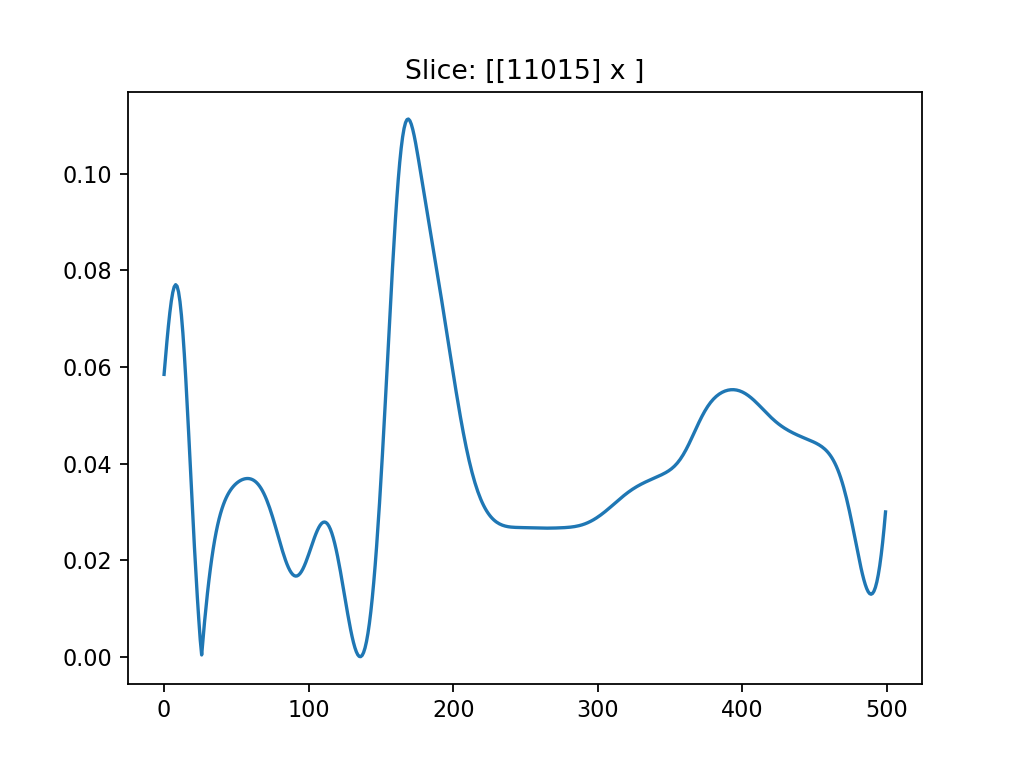

In [416]:
pl.LinePlot(fp_train[:,0,:]+1j*fp_train[:,1,:])

In [410]:
SP_t = torch.tensor(SP).cuda()

In [411]:
output_sp = nt0(SP_t)

In [412]:
output_sp1 = torch.mm(output_sp,B_tensor_cuda.detach().float().transpose(0,1))

In [413]:
output_sp1.shape

torch.Size([1, 22031])

In [414]:
output_sp1.argmax()

tensor(1126, device='cuda:0')

In [374]:
t1_t2_list = np.hstack((t1_list, t2_list)) # ms

In [380]:
t1_t2_list[1126,0]

96

In [377]:
T2_mapping[100,100]

98.0

<IPython.core.display.Javascript object>


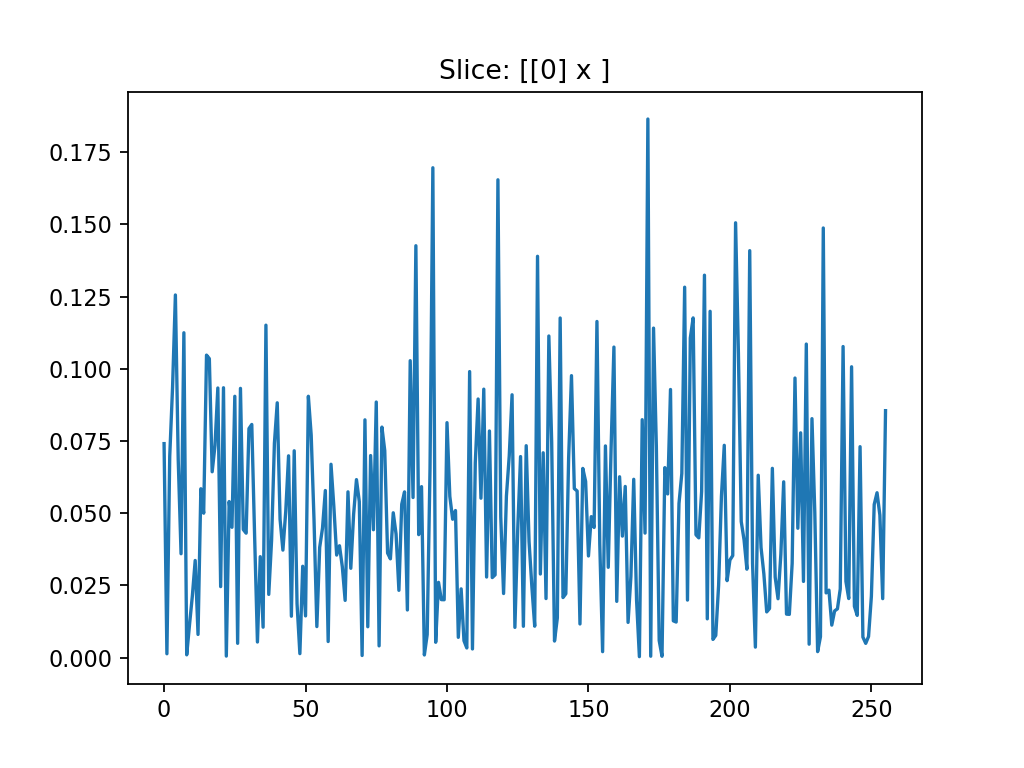

In [332]:
pl.LinePlot(output_sp.detach().cpu().numpy())

<IPython.core.display.Javascript object>


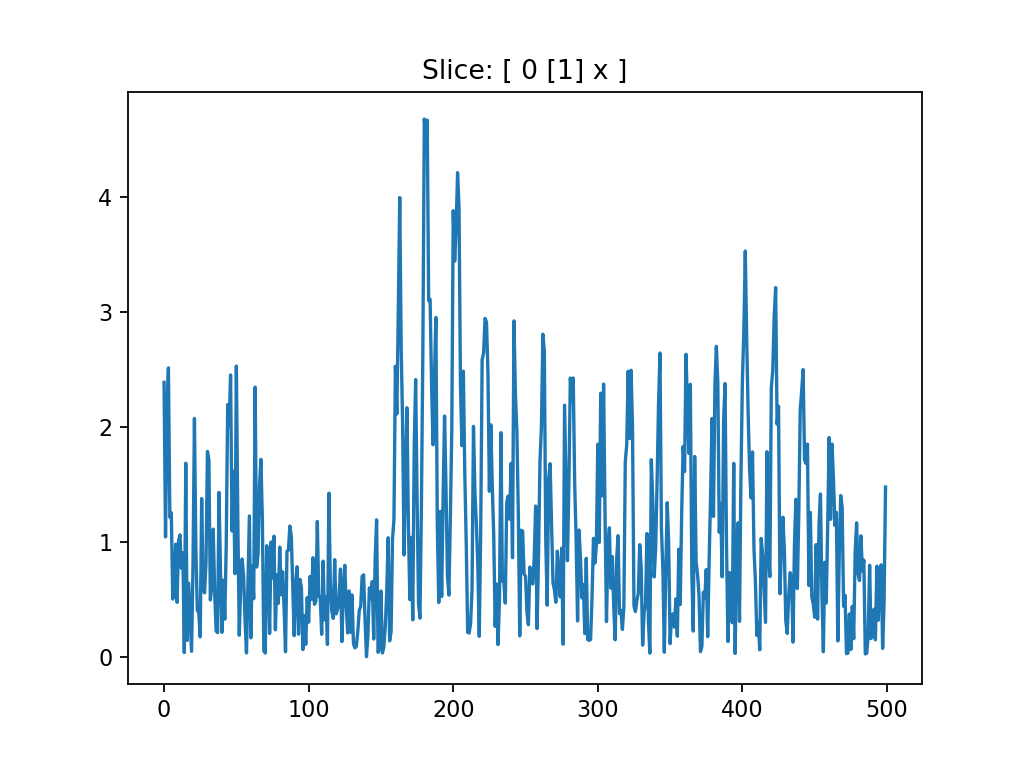

In [328]:
pl.LinePlot(SP)